In [127]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scripts.sa2_names import get_sa2_names
from scripts.preproccessing import add_data
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import linear_model

In [2]:
SA2_names = get_sa2_names()

In [3]:
SA2_names

['Alfredton',
 'Ballarat',
 'Buninyong',
 'Delacombe',
 'Smythes Creek',
 'Wendouree - Miners Rest',
 'Ballarat East - Warrenheip',
 'Ballarat North - Invermay',
 'Canadian - Mount Clear',
 'Sebastopol - Redan',
 'Bacchus Marsh Surrounds',
 'Creswick - Clunes',
 'Daylesford',
 'Gordon (Vic.)',
 'Avoca',
 'Beaufort',
 'Golden Plains - North',
 'Maryborough (Vic.)',
 'Maryborough Surrounds',
 'Bendigo',
 'California Gully - Eaglehawk',
 'East Bendigo - Kennington',
 'Flora Hill - Spring Gully',
 'Kangaroo Flat - Golden Square',
 'Maiden Gully',
 'Strathfieldsaye',
 'White Hills - Ascot',
 'Bendigo Surrounds - South',
 'Castlemaine',
 'Castlemaine Surrounds',
 'Heathcote',
 'Kyneton',
 'Woodend',
 'Bendigo Surrounds - North',
 'Loddon',
 'Bannockburn',
 'Golden Plains - South',
 'Winchelsea',
 'Belmont',
 'Geelong',
 'Geelong West - Hamlyn Heights',
 'Highton',
 'Lara',
 'Leopold',
 'Newcomb - Moolap',
 'Newtown (Vic.)',
 'North Geelong - Bell Park',
 'Charlemont',
 'Corio - Lovely Banks'

In [4]:
years = [str(year) for year in range(2006, 2025)]

# Create a list that repeats each SA2 name for every year
sa2_column = SA2_names * len(years)

# Create a list that repeats each year for all SA2 names
year_column = years * len(SA2_names)

# Create the DataFrame
df = pd.DataFrame({
    'SA2_NAME21': sa2_column,
    'year': year_column
})

In [5]:
ndf = add_data(df)

In [6]:
nndf = ndf.drop(['SA2_NAME21', 'year', 'housing_index', 'cpi_without_housing'], axis=1)

In [7]:
nndf

,num_homeless_persons,avg_household_size,num_businesses,median_income,median_age,median_weekly_rent,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed
0,36.078873,2.800000,0.0,34692.8,28.02,190.333333,0.533333,4.866667,5.50,16.133333,10464.086957,4.833333
1,36.735775,2.356667,2041.2,38950.5,33.34,192.966667,0.496667,5.593333,7.42,33.866667,10613.030691,6.523333
2,0.000000,2.846667,200.8,34089.8,30.64,240.666667,0.433333,4.266667,11.14,13.893333,10779.879795,6.293333
3,31.000000,2.703333,0.0,31742.1,32.94,157.833333,1.206667,6.453333,2.74,19.370000,10965.838875,5.680000
4,0.000000,3.000000,200.7,35227.8,37.04,217.333333,0.900000,6.140000,7.26,4.020000,11096.473146,4.440000
...,...,...,...,...,...,...,...,...,...,...,...,...
9913,20.200000,2.093333,504.1,36575.4,52.34,279.000000,1.313333,10.200000,15.68,20.053333,12834.097187,3.906667
9914,22.833333,2.516667,1124.8,49385.9,42.01,200.833333,1.866667,6.883333,6.90,15.750000,12696.762148,2.883333
9915,10.133333,2.406667,1261.4,49141.4,46.28,291.333333,1.586667,6.226667,7.80,15.726667,12808.882353,2.246667
9916,100.033333,2.396667,1301.0,56111.9,41.25,312.133333,2.110000,5.286667,9.14,26.666667,13106.132992,3.173333


In [8]:
y_train = nndf['median_weekly_rent']
X_train = nndf.drop(['median_weekly_rent'], axis=1)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
for feature, coef in zip(X_train.columns, lr.coef_):
    print(f'{feature}: {coef}')

num_homeless_persons: -0.045298658602586014
avg_household_size: 25.541400230911965
num_businesses: 0.010458598272160557
median_income: 0.004117903850463733
median_age: -0.8823015260925208
percent_aboriginal_torres_strait_islander: -12.754771895242927
percent_au_citizen: 1.8592489022790606
percent_overseas_born: 2.4845646176087457
percent_rental_properties: 0.2120527055504196
population: 0.008180188591529802
percent_unemployed: -11.740845344934753


In [12]:
clf = linear_model.Lasso(alpha=1)
clf.fit(X_train, y_train)

Lasso(alpha=1)

In [13]:
for feature, coef in zip(X_train.columns, clf.coef_):
    print(f'{feature}: {coef}')

num_homeless_persons: -0.044266377047417704
avg_household_size: 5.22217984016644
num_businesses: 0.009907595164308143
median_income: 0.0042344913803782
median_age: -1.280075300739358
percent_aboriginal_torres_strait_islander: -10.637936252073734
percent_au_citizen: 1.5761704988377534
percent_overseas_born: 2.696941107615411
percent_rental_properties: -0.2199193005092345
population: 0.007610639090698471
percent_unemployed: -11.335592798508532


In [120]:
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the random forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20]  # Maximum number of levels in each decision tree
}

In [123]:
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1, refit=True)
grid_search.fit(X_train, y_train)
rf = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/obli/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/obli/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/obli/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/obli/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/obli/.local/lib/pytho

In [128]:
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
avg_rmse_scores = np.mean(np.sqrt(abs(scores)))
print("Average RMSE:", avg_rmse_scores)

Average RMSE: 21.944198472394373



Feature Importances (Random Forest):
Feature: num_homeless_persons, Importance: 0.0209
Feature: avg_household_size, Importance: 0.0567
Feature: num_businesses, Importance: 0.0760
Feature: median_income, Importance: 0.2224
Feature: median_age, Importance: 0.0614
Feature: percent_aboriginal_torres_strait_islander, Importance: 0.0794
Feature: percent_au_citizen, Importance: 0.0742
Feature: percent_overseas_born, Importance: 0.2513
Feature: percent_rental_properties, Importance: 0.0377
Feature: population, Importance: 0.0823
Feature: percent_unemployed, Importance: 0.0376


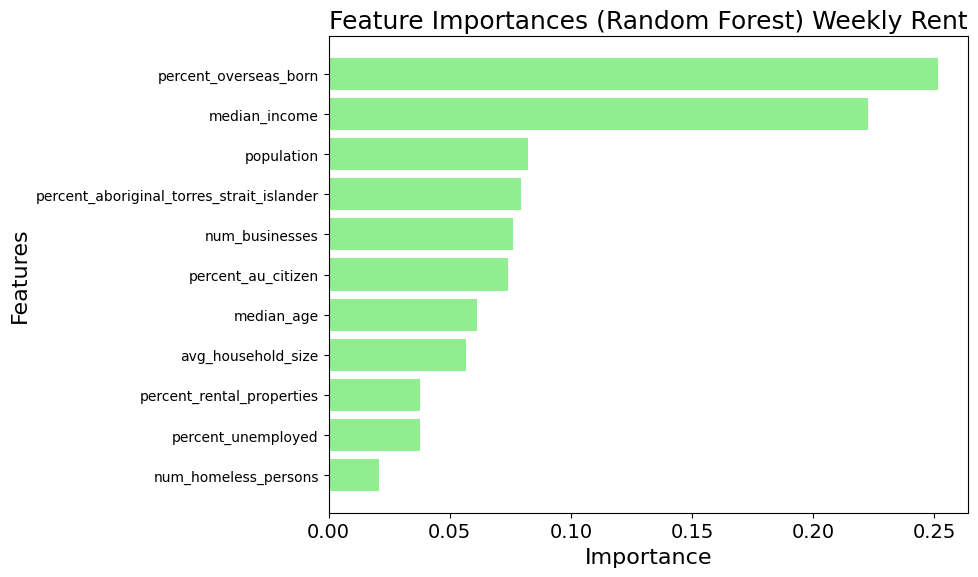

In [124]:


importance_rf = rf.feature_importances_
feature_names = X_train.columns

print("\nFeature Importances (Random Forest):")
for feature, importance in zip(feature_names, importance_rf):
    print(f'Feature: {feature}, Importance: {importance:.4f}')
    
# Set global font size
plt.rc('font', size=14)  # Set default font size for all text

# Plotting feature importances as a bar chart
plt.figure(figsize=(10, 6))

# Sorting the features by importance for better visualization
sorted_idx_rov = np.argsort(importance_rf)[::-1]
sorted_importance_rf_rov = importance_rf[sorted_idx_rov]
sorted_feature_names_rf_rov = feature_names[sorted_idx_rov]

# Create a bar chart
plt.barh(sorted_feature_names_rf_rov, sorted_importance_rf_rov, color='lightgreen')

# Set axis labels and title with specific font sizes
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)  # Optional, y-axis label usually not needed for barh
plt.title('Feature Importances (Random Forest) Weekly Rent', fontsize=18)

# Customize tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)

# Invert the y-axis to display the most important features at the top
plt.gca().invert_yaxis()

# Adjust layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()


In [14]:
future_years = [str(year) for year in range(2025, 2030)]

# Create a list that repeats each SA2 name for every year
future_sa2_column = SA2_names * len(future_years)

# Create a list that repeats each year for all SA2 names
future_year_column = future_years * len(SA2_names)

# Create the DataFrame
future_df = pd.DataFrame({
    'SA2_NAME21': future_sa2_column,
    'year': future_year_column
})

In [15]:
future_ndf = add_data(future_df)

In [43]:
future_nndf = future_ndf.drop(['housing_index', 'cpi_without_housing', 'median_weekly_rent'], axis=1)

In [44]:
future_nndf

,SA2_NAME21,year,num_homeless_persons,avg_household_size,num_businesses,median_income,median_age,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed
0,Alfredton,2025,56.781784,2.800000,1430.8,62670.3,35.62,1.293333,2.966667,18.42,32.093333,14420.682864,3.883333
1,Ballarat,2026,58.051643,2.166667,2852.5,61209.0,48.54,1.066667,4.833333,15.40,33.866667,14624.772379,4.433333
2,Buninyong,2027,59.333333,2.656667,603.6,65994.6,46.41,1.383333,5.216667,9.62,15.413333,14820.286445,3.063333
3,Delacombe,2028,50.000000,2.513333,1386.5,66293.6,32.18,2.726667,3.413333,15.66,28.680000,15014.808184,4.920000
4,Smythes Creek,2029,8.166667,3.000000,434.4,71381.0,43.69,2.800000,0.000000,8.02,3.640000,15208.063939,2.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,Otway,2025,29.200000,2.043333,564.6,41893.4,54.04,1.413333,11.200000,15.78,18.953333,14420.682864,3.456667
2606,Moyne - East,2026,35.333333,2.466667,1307.3,58866.4,43.26,2.066667,7.933333,7.40,15.900000,14624.772379,2.433333
2607,Moyne - West,2027,11.633333,2.356667,1483.4,55781.9,48.78,1.936667,6.526667,7.80,15.526667,14820.286445,1.396667
2608,Warrnambool - North,2028,110.533333,2.346667,1571.5,65271.4,44.60,2.260000,5.086667,10.24,25.666667,15014.808184,2.273333


In [45]:
X_test = future_nndf.drop(['SA2_NAME21', 'year'], axis=1)

In [100]:
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)

In [101]:
future_nndf['median_weekly_rent'] = y_pred

In [48]:
df_24 = ndf[ndf['year'] == "2024"]
#print(df_24[df_24['SA2_NAME21'] == "Abbotsford"])
df_24.head()
df_24.drop(['housing_index', 'cpi_without_housing'], axis=1, inplace=True)

/tmp/ipykernel_26657/1632609179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24.drop(['housing_index', 'cpi_without_housing'], axis=1, inplace=True)


In [102]:

all_df = pd.concat([future_nndf, df_24], ignore_index=True)
all_df['year'] = all_df['year'].astype(int)
all_df.sort_values(by=['SA2_NAME21', 'year'], inplace=True)
all_df.head()
#print(all_df[all_df['SA2_NAME21'] == "Abbotsford"])

,SA2_NAME21,year,num_homeless_persons,avg_household_size,num_businesses,median_income,median_age,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed,median_weekly_rent
2892,Abbotsford,2024,106.466667,1.78,1783.7,77162.4,34.46,0.673333,3.78,33.4,62.953333,14208.250639,4.186667,438.333333
1200,Abbotsford,2025,108.066667,1.74,1827.8,79726.7,34.81,0.703333,3.14,33.2,64.443333,14420.682864,4.126667,446.539333
156,Abbotsford,2026,109.666667,1.70,1871.9,82291.0,35.16,0.733333,2.50,33.0,65.933333,14624.772379,4.066667,449.229667
1722,Abbotsford,2027,111.266667,1.66,1916.0,84855.3,35.51,0.763333,1.86,32.8,67.423333,14820.286445,4.006667,446.858667
678,Abbotsford,2028,112.866667,1.62,1960.1,87419.6,35.86,0.793333,1.22,32.6,68.913333,15014.808184,3.946667,445.999425


In [103]:
all_growth_rates = all_df.pivot(index='SA2_NAME21', columns='year', values='median_weekly_rent')
all_growth_rates.columns = [f'{year}_median_rent' for year in all_growth_rates.columns]  # Rename columns
all_growth_rates.reset_index(inplace=True)  # Reset index to bring 'suburb' back as a column
for year in ["2025", "2026", "2027", "2028", "2029"]:
    all_growth_rates[f"{year}_pct_inc_from_2024"] =\
    ((all_growth_rates[f"{year}_median_rent"] / all_growth_rates["2024_median_rent"]) - 1) * 100

#all_growth_rates.sort_values(by="2029_pct_inc_from_2024", ascending=False).head(20)

In [125]:
sf = gpd.read_file("../data/SA2/SA2_extracted/SA2_2021_AUST_GDA2020.shp") # read SA2 shapefile
sf = sf[sf['STE_NAME21'] == 'Victoria'] # remove all instances not in victoria
sa2_gcc = pd.DataFrame({
    'SA2_NAME21': sf['SA2_NAME21'],
    'GCC_NAME21': sf['GCC_NAME21']
})

In [105]:
all_gr_gcc = pd.merge(all_growth_rates, sa2_gcc, on='SA2_NAME21', how='inner')
gm_growth_rates = all_gr_gcc[all_gr_gcc['GCC_NAME21'] == 'Greater Melbourne'].sort_values(by="2029_pct_inc_from_2024", ascending=False)
rv_growth_rates = all_gr_gcc[all_gr_gcc['GCC_NAME21'] == "Rest of Vic."].sort_values(by="2029_pct_inc_from_2024", ascending=False)

In [111]:
gm_growth_rates.head(20)

,SA2_NAME21,2024_median_rent,2025_median_rent,2026_median_rent,2027_median_rent,2028_median_rent,2029_median_rent,2025_pct_inc_from_2024,2026_pct_inc_from_2024,2027_pct_inc_from_2024,2028_pct_inc_from_2024,2029_pct_inc_from_2024,GCC_NAME21
287,Melbourne Airport,226.333333,259.170445,289.535125,363.584229,391.544325,412.790923,14.508297,27.924209,60.641044,72.994547,82.381851,Greater Melbourne
109,Cobblebank - Strathtulloh,315.466667,364.339000,378.987333,388.993260,454.304813,455.371202,15.492075,20.135461,23.307247,44.010402,44.348437,Greater Melbourne
291,Melton,320.000000,342.953819,360.756450,383.963839,412.878241,461.032470,7.173068,12.736390,19.988700,29.024450,44.072647,Greater Melbourne
137,Dandenong - North,332.666667,354.399333,363.612667,378.461000,428.876096,455.163667,6.532866,9.302405,13.765832,28.920670,36.822745,Greater Melbourne
457,Tarneit - North,363.800000,532.026649,545.781982,526.692297,509.980297,486.009297,46.241520,50.022535,44.775233,40.181500,33.592440,Greater Melbourne
101,Clarinda - Oakleigh South,430.666667,482.243333,518.577855,536.726522,558.170522,565.496189,11.976006,20.412815,24.626901,29.606158,31.307165,Greater Melbourne
180,Flemington,350.866667,418.372472,429.547800,431.658098,439.400878,448.177272,19.239732,22.424796,23.026249,25.233007,27.734354,Greater Melbourne
138,Dandenong - South,369.800000,387.985667,406.560333,418.602000,448.791859,465.828763,4.917703,9.940599,13.196863,21.360697,25.967756,Greater Melbourne
9,Altona Meadows,360.533333,397.741694,424.928361,434.144028,442.436361,453.989313,10.320366,17.861047,20.417167,22.717186,25.921592,Greater Melbourne
21,Bacchus Marsh,371.066667,419.170333,436.021667,450.389000,456.469667,462.365667,12.963618,17.504941,21.376842,23.015541,24.604474,Greater Melbourne


In [112]:
rv_growth_rates.head(20)

,SA2_NAME21,2024_median_rent,2025_median_rent,2026_median_rent,2027_median_rent,2028_median_rent,2029_median_rent,2025_pct_inc_from_2024,2026_pct_inc_from_2024,2027_pct_inc_from_2024,2028_pct_inc_from_2024,2029_pct_inc_from_2024,GCC_NAME21
7,Alps - West,0.000000,0.196667,0.196667,0.196667,0.196667,0.209838,inf,inf,inf,inf,inf,Rest of Vic.
453,Swan Hill Surrounds,187.333333,268.007333,378.629522,368.631711,368.590679,373.809012,43.064413,102.115403,96.778493,96.756590,99.542177,Rest of Vic.
441,Stawell,232.533333,251.915000,258.394667,256.191667,301.439679,427.253177,8.335006,11.121560,10.174169,29.632889,83.738465,Rest of Vic.
272,Longford - Loch Sport,216.333333,287.205949,324.492461,347.973461,365.657461,388.087127,32.760839,49.996515,60.850598,69.025020,79.393125,Rest of Vic.
12,Ararat Surrounds,168.333333,215.091667,246.700000,284.581667,291.523333,294.186000,27.777228,46.554455,69.058416,73.182178,74.763960,Rest of Vic.
470,Traralgon - East,268.000000,285.781221,299.459221,325.358077,390.046397,406.867566,6.634784,11.738515,21.402267,45.539700,51.816256,Rest of Vic.
345,Norlane,277.933333,301.212000,313.340333,331.450995,391.899078,420.307499,8.375630,12.739386,19.255575,41.004706,51.226013,Rest of Vic.
301,Mildura Surrounds,156.600000,195.892333,211.082000,218.004333,224.369667,234.598000,25.090890,34.790549,39.210941,43.275649,49.807152,Rest of Vic.
330,Myrtleford,270.666667,315.780644,334.106644,363.334667,388.794810,399.627553,16.667726,23.438415,34.236946,43.643403,47.645648,Rest of Vic.
417,Shepparton - North,294.000000,315.756333,335.583667,352.636092,404.150276,429.831545,7.400113,14.144104,19.944249,37.466080,46.201206,Rest of Vic.


In [29]:
## CHARLIES CODE: 
future_nndf['pct_change_rent'] = future_nndf.groupby('SA2_NAME21')['median_weekly_rent'].pct_change() * 100
future_nndf['pct_change_rent'] = future_nndf['pct_change_rent'].astype(float)

future_nndf['pct_change_rent'] = future_nndf['pct_change_rent'].astype(float)

# Calculate the average percentage change for each SA2_NAME21
average_pct_change = future_nndf.groupby('SA2_NAME21')['pct_change_rent'].mean().reset_index()

# Rename the column to reflect it is an average
average_pct_change.rename(columns={'pct_change_rent': 'average_pct_change'}, inplace=True)

# Sort the average percentage change in descending order
sorted_avg_pct_change = average_pct_change.sort_values(by='average_pct_change', ascending=False)

In [30]:
future_nndf.head(10)

,SA2_NAME21,year,num_homeless_persons,avg_household_size,num_businesses,median_income,median_age,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed,median_weekly_rent,pct_change_rent
5,Abbotsford,2024,106.466667,1.780000,1783.7,77162.4,34.46,0.673333,3.78,33.4,62.953333,14208.250639,4.186667,438.333333,NaN
0,Abbotsford,2025,108.066667,1.740000,1827.8,79726.7,34.81,0.703333,3.14,33.2,64.443333,14420.682864,4.126667,511.571261,16.708272
1,Abbotsford,2026,109.666667,1.700000,1871.9,82291.0,35.16,0.733333,2.50,33.0,65.933333,14624.772379,4.066667,522.177384,2.073245
2,Abbotsford,2027,111.266667,1.660000,1916.0,84855.3,35.51,0.763333,1.86,32.8,67.423333,14820.286445,4.006667,532.718243,2.018636
3,Abbotsford,2028,112.866667,1.620000,1960.1,87419.6,35.86,0.793333,1.22,32.6,68.913333,15014.808184,3.946667,543.251550,1.977275
4,Abbotsford,2029,114.466667,1.580000,2004.2,89983.9,36.21,0.823333,0.58,32.4,70.403333,15208.063939,3.886667,553.775221,1.937164
3414,Abbotsford,2024,106.466667,1.780000,1783.7,77162.4,34.46,0.673333,3.78,33.4,62.953333,14208.250639,4.186667,438.333333,-20.846344
11,Airport West,2024,6.533333,2.286667,1032.1,68344.4,39.82,0.660000,2.48,24.2,30.040000,14208.250639,4.486667,426.800000,NaN
6,Airport West,2025,6.433333,2.276667,1077.8,70388.3,40.01,0.680000,2.24,23.9,30.720000,14420.682864,4.476667,442.439375,3.664333
7,Airport West,2026,6.333333,2.266667,1123.5,72432.2,40.20,0.700000,2.00,23.6,31.400000,14624.772379,4.466667,451.372960,2.019166


In [31]:
sorted_avg_pct_change.tail(20)

,SA2_NAME21,average_pct_change
196,Gladstone Park - Westmeadows,0.029954
206,Gowanbrae,0.028881
232,Hughesdale,0.028594
217,Hawthorn - North,0.027627
185,Forest Hill,0.027524
382,Preston - West,0.027043
460,Taylors Lakes,0.024515
388,Reservoir - South West,0.023478
436,St Albans - South,0.023456
17,Ashwood - Chadstone,0.022583


In [32]:
future_nndf.head()

,SA2_NAME21,year,num_homeless_persons,avg_household_size,num_businesses,median_income,median_age,percent_aboriginal_torres_strait_islander,percent_au_citizen,percent_overseas_born,percent_rental_properties,population,percent_unemployed,median_weekly_rent,pct_change_rent
5,Abbotsford,2024,106.466667,1.78,1783.7,77162.4,34.46,0.673333,3.78,33.4,62.953333,14208.250639,4.186667,438.333333,NaN
0,Abbotsford,2025,108.066667,1.74,1827.8,79726.7,34.81,0.703333,3.14,33.2,64.443333,14420.682864,4.126667,511.571261,16.708272
1,Abbotsford,2026,109.666667,1.70,1871.9,82291.0,35.16,0.733333,2.50,33.0,65.933333,14624.772379,4.066667,522.177384,2.073245
2,Abbotsford,2027,111.266667,1.66,1916.0,84855.3,35.51,0.763333,1.86,32.8,67.423333,14820.286445,4.006667,532.718243,2.018636
3,Abbotsford,2028,112.866667,1.62,1960.1,87419.6,35.86,0.793333,1.22,32.6,68.913333,15014.808184,3.946667,543.251550,1.977275


In [35]:
growth_rates_by_suburb = future_nndf.pivot(index='SA2_NAME21', columns='year', values='pct_change_rent')
growth_rates_by_suburb.columns = [f'{year}_pct_change' for year in growth_rates_by_suburb.columns]  # Rename columns
growth_rates_by_suburb.reset_index(inplace=True)  # Reset index to bring 'suburb' back as a column
growth_rates_by_suburb.head()

,SA2_NAME21,2024_pct_change,2025_pct_change,2026_pct_change,2027_pct_change,2028_pct_change,2029_pct_change,2024_pct_change
0,Abbotsford,NaN,16.708272,2.073245,2.018636,1.977275,1.937164,-20.846344
1,Airport West,NaN,3.664333,2.019166,1.964743,1.925244,1.886825,-10.702551
2,Albert Park,NaN,1.176641,0.880025,0.859805,0.851037,0.842035,-4.484364
3,Alexandra,NaN,6.871195,2.244273,2.173345,2.124661,2.077393,-14.078365
4,Alfredton,NaN,-0.169658,2.443585,2.369473,2.312834,2.258117,-8.703463
